In [1]:
## Recovery of properties for the matched clusters. 

# Import and Setup

### Import generic packages 

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from glob import glob
import numpy as np
import healpy as hp
import struct

import setup
from astropy.table import Table
#Coordinate
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import SkyCoord
from astropy.io import fits

import pandas as pd
from tqdm import tqdm
import math

import pickle

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Matplotlib parameters.

In [ ]:
#Plotting params
#Plotting parameters
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter


mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.labelsize'], mpl.rcParams['ytick.labelsize'] = 20, 20

# Parameters used in this module
# One dictionary to store default values
# Another that user can view/change as necessary
Default_Params = {'default_cmap'   : plt.cm.coolwarm,
                  'title_fontsize' : 25,
                  'legend_fontsize': 22,
                  'xlabel_fontsize': 30,
                  'ylabel_fontsize': 30,
                  'scatter_factor' : 1.0}

Params = Default_Params.copy()

### Matching algorithm


In [177]:
from matched_clusters import matched_clusters

### Import Catalogs

In [4]:
##Created a combined dataframe of SPT matched DES clusters in the DES Y3 footprint. 
datadir = setup.data_home_dir()
bigdatadir = setup.bigdata_home_dir()

In [104]:
## Import the RM targeted run catalog. 
redM_targ_pol100d = datadir + '/redMaPPer/y3_gold_2.2.1_wide_sofcol_run2_sptpol100d_092821_lambda_chisq.csv'
redM_targ_pol100d = pd.read_csv(redM_targ_pol100d)
print(redM_targ_pol100d.columns)
print("Number of clusters equals", len(redM_targ_pol100d))

Index(['MEM_MATCH_ID', 'RA', 'DEC', 'Z', 'SPT_ID', 'LAMBDA_CHISQ',
       'LAMBDA_CHISQ_E', 'LAMBDA_CHISQ_ZORIG', 'SCALEVAL', 'LAMBDA_ZRED',
       'LAMBDA_ZRED_E', 'MASKFRAC', 'GEOMASKFRAC', 'R_LAMBDA', 'R_MASK',
       'Z_LAMBDA', 'Z_LAMBDA_E', 'NCROSS', 'Z_LAMBDA_NITER', 'DLAMBDA_DZ',
       'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ', 'DLAMBDAVAR_DZ2', 'C_LAMBDA',
       'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'PZBINS', 'PZ', 'Z_LAMBDA_RAW',
       'Z_LAMBDA_E_RAW', 'P_BCG', 'BCG_SPEC_Z', 'LIM_EXPTIME',
       'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD'],
      dtype='object')
Number of clusters equals 79


In [91]:
import pickle
## Read the saved matched clusters. 
matched_pkl = 'output/' + 'matched_pol100_lgt5_vl50_dsep1000_deltaz0.1.pkl'

with open(matched_pkl, 'rb') as inp:
    matched_cl_pol100d = pickle.load(inp)

In [92]:
import pickle
## Read the saved matched clusters. 
matched_pkl = 'output/' + 'matched_RMY3_lgt5_lv50_mcmf_sz_dsep1000_deltaz0.1.pkl'

with open(matched_pkl, 'rb') as inp:
    matched_cl_mcmf = pickle.load(inp)

In [93]:
top_match_pol100d = matched_cl_pol100d.get_match_top_df()
multiple_match_pol100d = matched_cl_pol100d.get_match_candidates_df()
no_match_pol100d = matched_cl_pol100d.get_nomatch_df()

In [94]:
top_match_mcmf = matched_cl_mcmf.get_match_top_df()
multiple_match_mcmf = matched_cl_mcmf.get_match_candidates_df()
no_match_mcmf = matched_cl_mcmf.get_nomatch_df()

In [189]:
##redMaPPer member catalog
## RedMaPPer catalog
#DES--redMaPPer full run vl50
redM_mem = datadir + 'redMaPPer/y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl50_catalog.csv'
redM_targ_pol100d_mem = pd.read_csv(redM_mem)

print(redM_targ_pol100d_mem.columns)



Index(['MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG',
       'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z',
       'Z_SPEC_INIT', 'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E',
       'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC',
       'GEOMASKFRAC', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ',
       'Z_LAMBDA', 'Z_LAMBDA_E', 'Z_LAMBDA_NITER', 'EBV_MEAN', 'LNLAMLIKE',
       'LNBCGLIKE', 'LNLIKE', 'PZBINS', 'PZ', 'NCROSS', 'RMASK', 'RA_ORIG',
       'DEC_ORIG', 'W', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ',
       'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C', 'LAMBDA_CHISQ_CE', 'NCENT',
       'NCENT_GOOD', 'RA_CENT', 'DEC_CENT', 'ID_CENT', 'LAMBDA_CHISQ_CENT',
       'ZLAMBDA_CENT', 'P_BCG', 'P_CEN', 'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT',
       'P_C', 'BCG_ILUM', 'ILUM', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW',
       'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD',
       'MASKGAL_INDEX'],
      dtype='object')

### Importing the ZMASK for the volume limited sample. 

In [29]:
RM_zmax_file = bigdatadir + 'redMaPPer/' + 'y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt20_vl02_vlim_zmask.csv'

In [30]:
RM_zmax = pd.read_csv(RM_zmax_file)

#### Cleaning up the Zmask file

In [23]:
#Converting HPIX into integer
RM_zmax['HPIX'] = RM_zmax['HPIX'].astype(int)

In [24]:
#Drop duplicated
print("Length of file is", len(RM_zmax)) 
RM_zmax.drop_duplicates(subset=['HPIX'], inplace=True)
print("After dropping duplicated length of file is", len(RM_zmax)) 

Length of file is 31469613
After dropping duplicated length of file is 22841162


In [25]:
# Remove NAN values
print("Length of file is", len(RM_zmax)) 
RM_zmax.dropna(inplace=True)
print("After removing NAN length of file is", len(RM_zmax)) 

Length of file is 22841162
After removing NAN length of file is 22841161


In [26]:
#Replace NAN values with 0
print(RM_zmax['FRACGOOD'].isnull().sum())
RM_zmax['FRACGOOD'] = RM_zmax['FRACGOOD'].fillna(0)

0


# Testing edge cases--SPTpol100d

### pol100D Category 1

5 clusters with Z<0.95 not detected by the RMY3 full sample.

In [85]:
catg1_sptid = ['SPT-CLJ2310-5919', 'SPT-CLJ2320-5807', 'SPT-CLJ2341-5640', 'SPT-CLJ2328-5550', 'SPT-CLJ0002-5017']

In [105]:
redM_targ_cat1 = redM_targ_pol100d[redM_targ_pol100d.SPT_ID.isin(catg1_sptid)]

In [88]:
redM_targ_cat1['Z_LAMBDA']

4     0.958624
20    0.000000
35    0.000000
42    0.835793
58    0.000000
Name: Z_LAMBDA, dtype: float64

### SPTpol Category 2:
Category 2: 1 cluster found by RMY3 full run but not found in targeted RM at SPT center.

Cluster ID = 'SPT-CLJ2311-5820'

In [100]:
catg2_pol100d = top_match_pol100d[top_match_pol100d.SPT_ID == 'SPT-CLJ2311-5820']

#### Check for matching properties

Including:
* redshift
* multiple matches -- no multiple matches
* redshift separation
* distance separation. 

In [101]:
multiple_match_pol100d[multiple_match_pol100d.SPT_ID == 'SPT-CLJ2311-5820']
### No multiple matches found in the vicinity

,SPT_ID,RA_SPT,DEC_SPT,xi,theta_core,Z_SPT,redshift_unc,M500,M500_lerr,M500_uerr,imaging,P_blank,FIELD,MEM_MATCH_ID,propD_sep,Delta_Z,LAMBDA_CHISQ,MASKFRAC
25,SPT-CLJ2311-5820,347.99548,-58.336319,5.469923,0.25,0.93,0.08685,2.245407,-0.414595,0.403629,3,0.0196,SPTPOL_100d,[29358],[199.30386277266015],[-0.09454660000000004],[33.046486],[0.017735932]


In [82]:
catg2_pol100d[['Z_LAMBDA','Z_SPT', 'propD_sep', 'Delta_Z' ]]

,Z_LAMBDA,Z_SPT,propD_sep,Delta_Z
25,0.827423,0.93,199.303863,-0.094547


#### Comparing with the targeted run

In [106]:
redM_targ_cat2 = redM_targ_pol100d[redM_targ_pol100d.SPT_ID == 'SPT-CLJ2311-5820']

In [84]:
redM_targ_cat2['Z_LAMBDA']

23    0.0
Name: Z_LAMBDA, dtype: float64

#### Testing pixel with zmask

In [79]:
catg2_pol100d_pix=hp.ang2pix(4096, catg2_pol100d.RA_SPT.values, catg2_pol100d.DEC_SPT.values, lonlat=True)

In [64]:
RM_zmax[RM_zmax.HPIX.isin(catg2_pol100d_pix)]


,HPIX,FRACGOOD,ZMAX,MASKFRAC_EST
21081806,186338414,0.859375,0.831,0.0


### SPTpol100d Category 4: 
Category 4: top_match_merge.LAMBDA_CHISQ  - top_match_merge.LAMBDA_CHISQ_TARG > 10.

**SPT-ID**
* SPT-CLJ0001-5440
* SPT-CLJ2304-5718
* SPT-CLJ2311-5820
* SPT-CLJ2312-5101
* SPT-CLJ2314-5554
* SPT-CLJ2327-5137
* SPT-CLJ2328-5533
* SPT-CLJ2329-5831
* SPT-CLJ2355-5850

In [50]:
catg4_sptids = ['SPT-CLJ0001-5440', 'SPT-CLJ2304-5718', 'SPT-CLJ2311-5820', 'SPT-CLJ2312-5101', 'SPT-CLJ2314-5554', \
              'SPT-CLJ2327-5137', 'SPT-CLJ2328-5533', 'SPT-CLJ2329-5831', 'SPT-CLJ2355-5850']

In [97]:
catg4_pol100d = top_match[top_match_pol100d.SPT_ID.isin(catg4_sptids)]

In [98]:
catg4_pol100d[['Z_LAMBDA', 'propD_sep']]

,Z_LAMBDA,propD_sep
2,0.882726,113.169717
16,0.940445,89.699718
25,0.827423,199.303863
26,0.359154,801.090934
27,0.781493,79.139499
43,0.365824,77.732
44,0.811996,173.532496
46,0.800884,145.445538
83,0.913411,113.225684


#### Testing for ZMax

In three cases the cluster SPT/RM redshift is lower than ZMax for vl20. These are interesting cases to look at further. 

In [99]:
catg4_pol100d = top_match_pol100d[top_match_pol100d.SPT_ID.isin(catg4_sptids)]

In [66]:
catg4_pol100d_pix=hp.ang2pix(4096, catg4_pol100d.RA_SPT.values, catg4_pol100d.DEC_SPT.values, lonlat=True)

In [67]:
RM_zmax[RM_zmax.HPIX.isin(catg4_pol100d_pix)]

,HPIX,FRACGOOD,ZMAX,MASKFRAC_EST
18168421,178928030,0.953125,0.700,0.0
18424461,179579278,1.000000,0.599,0.0
19706709,182788645,1.000000,0.697,0.0
20067145,183678593,1.000000,0.652,0.0
20209904,184033137,1.000000,0.686,0.0
20739799,185393144,1.000000,0.876,0.0
21081806,186338414,0.859375,0.831,0.0
21137242,186524124,1.000000,0.713,0.0
21222964,186805900,1.000000,0.740,0.0


#### Multiple matches

Two cases of multiple associatation. In both cases they were matched to another cluster of richness ~5. This shouldn't be the cause. 

In [102]:
catg4_pol100d_mulitple = multiple_match_pol100d[multiple_match_pol100d.SPT_ID.isin(catg4_sptids)]
catg4_pol100d_mulitple

,SPT_ID,RA_SPT,DEC_SPT,xi,theta_core,Z_SPT,redshift_unc,M500,M500_lerr,M500_uerr,imaging,P_blank,FIELD,MEM_MATCH_ID,propD_sep,Delta_Z,LAMBDA_CHISQ,MASKFRAC
2,SPT-CLJ0001-5440,0.413165,-54.669517,9.110645,0.50,0.820000,0.081900,3.368699,-0.478318,0.397177,3,0.0089,SPTPOL_100d,"[4836, 5083]","[113.16971664835805, 446.0616603476695]","[0.0872212, 0.057372150000000066]","[85.26427, 5.1756496]","[0.0076560657, 0.0]"
16,SPT-CLJ2304-5718,346.108040,-57.309929,6.252863,0.25,0.897056,0.033198,2.526848,-0.422457,0.384965,3,0.0640,SPTPOL_100d,[50193],[89.69971838111842],[0.04085490000000003],[30.590436999999998],[0.0035366933]
25,SPT-CLJ2311-5820,347.995480,-58.336319,5.469923,0.25,0.930000,0.086850,2.245407,-0.414595,0.403629,3,0.0196,SPTPOL_100d,[29358],[199.30386277266015],[-0.09454660000000004],[33.046486],[0.017735932]
26,SPT-CLJ2312-5101,348.242120,-51.029217,4.812294,1.00,0.350000,0.024300,2.376228,-0.488565,0.422968,3,-1.0000,SPTPOL_100d,[4714],[801.0909343586947],[0.01415145000000001],[41.77233],[0.007378472]
27,SPT-CLJ2314-5554,348.535490,-55.901563,4.879810,0.25,0.711617,0.044238,2.183504,-0.458220,0.375759,3,0.0743,SPTPOL_100d,[50081],[79.13949900832982],[0.07684649999999993],[31.048085999999998],[0.009201748000000001]
43,SPT-CLJ2327-5137,351.780070,-51.623137,6.222599,1.25,0.338100,0.024020,2.904867,-0.489829,0.440510,3,-1.0000,SPTPOL_100d,[934],[77.7320003971485],[0.04011644999999997],[72.22126],[0.012916246000000001]
44,SPT-CLJ2328-5533,352.178020,-55.560460,7.876473,0.25,0.772674,0.031000,3.081217,-0.461954,0.390356,3,0.0159,SPTPOL_100d,[7329],[173.53249552130913],[0.05351504000000007],[60.39866],[0.008595988]
46,SPT-CLJ2329-5831,352.471240,-58.524097,10.805716,0.50,0.719200,0.044680,3.868954,-0.520454,0.440359,3,0.0007,SPTPOL_100d,[4090],[145.44553751173387],[0.0872042300000001],[64.18189],[0.0065053874]
83,SPT-CLJ2355-5850,358.961900,-58.846784,4.935186,0.25,0.970000,0.084273,2.042466,-0.426199,0.365302,3,0.0007,SPTPOL_100d,"[15483, 18851]","[113.22568385715223, 214.40758412211696]","[-0.05338700000000007, -0.07106849999999987]","[46.928513, 5.1298847]","[0.0053033517, 0.003155479]"


#### Comparing RM fullrun with RM targeted_run

In [107]:
redM_targ_catg4 = redM_targ_pol100d[redM_targ_pol100d.SPT_ID.isin(catg4_sptids)]

## Testing Edge Cases--MCMF SZ

### Category 1:  

5 < LAMBDA_CHISQ < 10, LAMBDA_LFC > 30. Check for Z in [0.25,0.65]

Check for redshift and distance separation. Check for multiple matches and zmask. It may be worthwhile to tag it with targeted RM. 

#### Finding clusters that fit this description

In [161]:
##Find clusters that fit this description 

mask = (top_match_mcmf.LAMBDA_CHISQ < 10) & (top_match_mcmf.LAMBDA_CHISQ > 5)
mask &= (top_match_mcmf.LAMBDA_LFC > 20)

catg1_mcmf = top_match_mcmf[mask]

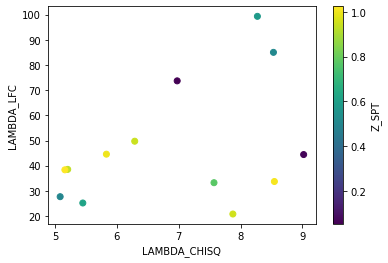

In [162]:
sc = plt.scatter(catg1_mcmf.LAMBDA_CHISQ, catg1_mcmf.LAMBDA_LFC, c=catg1_mcmf.Z_SPT)
plt.ylabel('LAMBDA_LFC')
plt.xlabel('LAMBDA_CHISQ')
cbar = plt.colorbar(sc)
cbar.set_label('Z_SPT')

In [163]:
catg1_sptid =catg1_mcmf.SPT_ID.values

#### Recording the properties

Includes:
* SPT_ID
* RA
* DEC
* LAMBDA_CHISQ
* LAMBDA_LFC
* Z_LAMBDA
* Z_SPT
* Z_LFC (or equiv for MCMF)
* Masking fraction

In [164]:
quantities = ['SPT_ID', 'xi', 'RA_SPT',
 'DEC_SPT','Z_LAMBDA', 'Z_SPT', 'Z_P1', 'Z_P2', 'Z_P3', 'F_CONT_LFC', 'LAMBDA_CHISQ', 'LAMBDA_LFC', 'MASKFRAC', 'propD_sep', 'Delta_Z']

In [166]:
catg1_mcmf[quantities]

,SPT_ID,xi,RA_SPT,DEC_SPT,Z_LAMBDA,Z_SPT,Z_P1,Z_P2,Z_P3,F_CONT_LFC,LAMBDA_CHISQ,LAMBDA_LFC,MASKFRAC,propD_sep,Delta_Z
40,SPT-CLJ2331-5051,10.471606,352.958740,-50.864006,0.580959,0.578137,0.578137,-0.100000,-0.100000,0.000000,8.272409,99.324648,0.012945,95.130666,0.005398
197,SPT-CLJ0304-4748,6.381045,46.148700,-47.810936,0.378504,0.509400,0.509400,0.653150,0.250000,0.000000,8.531744,85.019921,0.043798,692.035732,-0.068821
217,SPT-CLJ2040-5725,6.238894,310.053100,-57.428608,0.855131,0.930793,0.930793,0.372110,0.042500,0.005999,5.206160,38.542265,0.013143,609.790318,-0.067268
430,SPT-CLJ0354-4058,4.920193,58.666386,-40.978577,0.914485,1.000300,1.000300,-0.100000,-0.100000,0.003964,5.831614,44.583822,0.034081,896.653366,-0.084747
490,SPT-CLJ2148-4843,4.768834,327.096770,-48.728090,0.930165,0.955950,0.955950,0.238540,1.205075,0.053941,7.875780,20.816660,0.000000,347.504596,-0.024555
496,SPT-CLJ2137-6437,4.757717,324.414950,-64.623170,0.856268,0.947500,0.947500,0.060500,-0.100000,0.000000,6.289263,49.729787,0.047032,883.012605,-0.086989
563,SPT-CLJ2039-4143,4.659951,309.839700,-41.727740,0.696234,0.616760,0.616760,0.070260,-0.100000,0.025050,5.450239,25.191377,0.108437,899.296334,0.080603
685,SPT-CLJ2233-4444,4.493567,338.434970,-44.733364,0.778043,0.772400,0.772400,0.866800,1.200225,0.007842,7.570681,33.254965,0.159079,971.283515,0.009124
789,SPT-CLJ2012-5650,4.402037,303.129940,-56.845870,0.124968,0.052260,0.052260,0.565845,0.282573,0.061092,6.975737,73.702038,0.152915,889.389453,0.07092
796,SPT-CLJ2144-5142,4.399118,326.209870,-51.701530,0.930266,1.011408,1.011408,0.053750,-0.100000,0.011909,8.546999,33.725184,0.015352,463.692516,-0.081008


#### Find multiple matches

In [167]:
multiple_match_mcmf_catg1 = multiple_match_mcmf[multiple_match_mcmf.SPT_ID.isin(catg1_sptid)]

In [168]:
multiple_match_mcmf_catg1

,XPEAK,YPEAK,PEAKVAL,xi,WHFILT,SIG_V_FILT,NPIXELSX,NPIXELSY,FIELD,DEPTH,...,DES_OR_HZ,RA_COMB,DEC_COMB,M500_COMB,F_CONT_COMB_UC,MEM_MATCH_ID,propD_sep,Delta_Z,LAMBDA_CHISQ,MASKFRAC
40,1748.990723,686.861816,0.000670,10.471606,0,"(10.471606254577637, 4.596691608428955, 10.372...",3360.0,3360.0,ra23h30dec-55,1.0,...,0.0,352.966299,-50.866387,3.629279e+14,0.000000,[185],[95.1306663483268],[0.00539820000000002],[8.272409],[0.012944984]
197,3743.489014,974.124512,0.000485,6.381045,0,"(6.381044864654541, 6.325816631317139, 6.21888...",4700.0,3000.0,ra2h30dec-50,1.0,...,0.0,46.140055,-47.810356,2.693354e+14,0.000000,[64827],[692.035732166794],[-0.06882093999999994],[8.531744],[0.043797605]
217,1660.339966,882.365967,0.000237,6.238894,1,"(6.109960079193115, 6.238894462585449, 6.17531...",4600.0,3000.0,ra21hdec-60,1.0,...,0.0,310.063386,-57.431264,2.319156e+14,0.005999,[150164],[609.7903182093129],[-0.06726759999999987],[5.206159599999999],[0.013142856999999999]
430,5466.782227,534.357971,0.000366,4.920193,0,"(4.920192718505859, 4.684126377105713, 4.43295...",8700.0,1800.0,ra3h30dec-42.5,1.0,...,0.0,58.671454,-40.981660,1.896953e+14,0.003964,[1405942],[896.653365529353],[-0.08474684999999993],[5.8316135000000004],[0.034081228]
490,4814.564941,1494.241455,0.000364,4.768834,0,"(4.768834114074707, 4.3252177238464355, NaN, N...",5800.0,3600.0,ra21hdec-50,1.0,...,1.0,327.086664,-48.733290,1.865400e+14,0.002128,[343007],[347.5045956201747],[-0.024555499999999952],[7.875780000000001],[0.0]
496,3267.891357,2609.061279,0.000129,4.757717,2,"(4.702813148498535, 4.597726821899414, 4.75771...",4600.0,3000.0,ra21hdec-60,1.0,...,0.0,324.433741,-64.623380,1.822450e+14,0.000000,[339530],[883.012604714229],[-0.08698876],[6.289263],[0.047032475]
563,2025.205688,714.157776,0.000193,4.659951,1,"(4.598289966583252, 4.659951210021973, 4.60850...",5900.0,1800.0,ra21hdec-42.5,1.0,...,0.0,309.834286,-41.734550,2.062520e+14,0.025050,[530068],[899.2963340190935],[0.08060349999999994],[5.450239],[0.10843714]
685,1830.206299,1435.507690,0.000348,4.493567,0,"(4.49356746673584, 4.24296760559082, NaN, NaN,...",5900.0,3000.0,ra23hdec-45,1.0,...,0.0,338.433040,-44.724718,1.912196e+14,0.007842,[379574],[971.2835154717733],[0.009123800000000015],[7.570680599999999],[0.15907860000000001]
789,741.503235,742.509155,0.000308,4.402037,0,"(4.402036666870117, NaN, NaN, NaN, NaN, NaN, N...",4600.0,3000.0,ra21hdec-60,1.0,...,0.0,303.106228,-56.836206,2.103790e+14,0.061092,[590743],[889.3894531904675],[0.07091972],[6.975736599999999],[0.15291529999999998]
796,4566.876953,2207.867432,0.000178,4.399118,1,"(4.320101261138916, 4.399117946624756, 4.22367...",5800.0,3600.0,ra21hdec-50,1.0,...,0.0,326.206507,-51.695415,1.839052e+14,0.011909,[954730],[463.69251598680324],[-0.0810084000000002],[8.546999000000001],[0.015352038]


#### Rerun matching using more liberal matching algorithm to test for missed clusters

In [171]:
##Created a combined dataframe of SPT matched DES clusters in the DES Y3 footprint. 
datadir = setup.data_home_dir()

#SPT
mcmf_sz_all = datadir + 'spt_catalogs/SPT-SZ_SN4_MCMF_6Jul2021.csv'
mcmf_sz_all = pd.read_csv(mcmf_sz_all)

print(mcmf_sz_all.columns)

Index(['XPEAK', 'YPEAK', 'PEAKVAL', 'PEAKSIG', 'WHFILT', 'SIG_V_FILT',
       'NPIXELSX', 'NPIXELSY', 'FIELD', 'DEPTH', 'RA', 'DEC', 'SCALE_FACTOR',
       'SPT_ID', 'Z_BOCQ', 'EZ_BOCQ', 'SPEC', 'Z_P1', 'Z_P2', 'Z_P3',
       'LAMBDA_P1', 'LAMBDA_P2', 'LAMBDA_P3', 'F_CONT_P1', 'F_CONT_P2',
       'F_CONT_P3', 'M500_P1', 'M500_P2', 'M500_P3', 'M500_HZ1_P1',
       'M500_HZ1_P2', 'M500_HZ2_P1', 'M500_HZ2_P2', 'M500_HZ1_LFC',
       'M500_HZ2_LFC', 'F_CONT_LFC', 'Z_LFC', 'LAMBDA_LFC', 'M500_LFC',
       'D_NEXTFCONT', 'F_CONT_HZ1_LFC', 'F_CONT_HZ2_LFC', 'Z_HZ1_LFC',
       'Z_HZ2_LFC', 'LAMBDA_HZ1_LFC', 'LAMBDA_HZ2_LFC', 'MSTAR_HZ1_LFC',
       'MSTAR_HZ2_LFC', 'Z_COMB', 'F_CONT_COMB', 'LAMBDA_COMB', 'DES_OR_HZ',
       'RA_COMB', 'DEC_COMB', 'M500_COMB', 'F_CONT_COMB_UC'],
      dtype='object')


In [175]:
## RedMaPPer catalog
#DES--redMaPPer full run vl50
redM_full = datadir + 'redMaPPer/y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl50_catalog.csv'
redM_data = pd.read_csv(redM_full)

print(redM_data.columns)


Index(['MEM_MATCH_ID', 'RA', 'DEC', 'MODEL_MAG', 'MODEL_MAGERR', 'REFMAG',
       'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z',
       'Z_SPEC_INIT', 'Z_INIT', 'Z', 'LAMBDA_CHISQ', 'LAMBDA_CHISQ_E',
       'LAMBDA_ZRED', 'LAMBDA_ZRED_E', 'R_LAMBDA', 'SCALEVAL', 'MASKFRAC',
       'GEOMASKFRAC', 'C_LAMBDA', 'C_LAMBDA_ERR', 'MAG_LAMBDA_ERR', 'CHISQ',
       'Z_LAMBDA', 'Z_LAMBDA_E', 'Z_LAMBDA_NITER', 'EBV_MEAN', 'LNLAMLIKE',
       'LNBCGLIKE', 'LNLIKE', 'PZBINS', 'PZ', 'NCROSS', 'RMASK', 'RA_ORIG',
       'DEC_ORIG', 'W', 'DLAMBDA_DZ', 'DLAMBDA_DZ2', 'DLAMBDAVAR_DZ',
       'DLAMBDAVAR_DZ2', 'LAMBDA_CHISQ_C', 'LAMBDA_CHISQ_CE', 'NCENT',
       'NCENT_GOOD', 'RA_CENT', 'DEC_CENT', 'ID_CENT', 'LAMBDA_CHISQ_CENT',
       'ZLAMBDA_CENT', 'P_BCG', 'P_CEN', 'Q_CEN', 'P_FG', 'Q_MISS', 'P_SAT',
       'P_C', 'BCG_ILUM', 'ILUM', 'Z_LAMBDA_RAW', 'Z_LAMBDA_E_RAW',
       'LIM_EXPTIME', 'LIM_LIMMAG_DERED', 'LIM_LIMMAG', 'LIM_LIMMAG_HARD',
       'MASKGAL_INDEX'],
      dtype='object')

In [172]:
mcmf_sz_rerun = mcmf_sz_all[mcmf_sz_all.SPT_ID.isin(catg1_sptid)]

In [176]:
#Change the names of the dataframes
##Renaming some of the SPT and RedmaPPer column names to avoid using the same name. 
mcmf_sz_rerun.rename(columns = {"PEAKSIG":"XI","RA":"RA_SPT", "DEC":"DEC_SPT", "Z_LFC":"Z_SPT", "M500_LFC":"M500",}, inplace=True)
print(mcmf_sz_rerun.columns)

redM_data.rename(columns = {"RA":"RA_REDM", "DEC":"DEC_REDM", "Z":"Z_REDM"}, inplace=True)
print(redM_data.columns)

Index(['XPEAK', 'YPEAK', 'PEAKVAL', 'XI', 'WHFILT', 'SIG_V_FILT', 'NPIXELSX',
       'NPIXELSY', 'FIELD', 'DEPTH', 'RA_SPT', 'DEC_SPT', 'SCALE_FACTOR',
       'SPT_ID', 'Z_BOCQ', 'EZ_BOCQ', 'SPEC', 'Z_P1', 'Z_P2', 'Z_P3',
       'LAMBDA_P1', 'LAMBDA_P2', 'LAMBDA_P3', 'F_CONT_P1', 'F_CONT_P2',
       'F_CONT_P3', 'M500_P1', 'M500_P2', 'M500_P3', 'M500_HZ1_P1',
       'M500_HZ1_P2', 'M500_HZ2_P1', 'M500_HZ2_P2', 'M500_HZ1_LFC',
       'M500_HZ2_LFC', 'F_CONT_LFC', 'Z_SPT', 'LAMBDA_LFC', 'M500',
       'D_NEXTFCONT', 'F_CONT_HZ1_LFC', 'F_CONT_HZ2_LFC', 'Z_HZ1_LFC',
       'Z_HZ2_LFC', 'LAMBDA_HZ1_LFC', 'LAMBDA_HZ2_LFC', 'MSTAR_HZ1_LFC',
       'MSTAR_HZ2_LFC', 'Z_COMB', 'F_CONT_COMB', 'LAMBDA_COMB', 'DES_OR_HZ',
       'RA_COMB', 'DEC_COMB', 'M500_COMB', 'F_CONT_COMB_UC'],
      dtype='object')
Index(['MEM_MATCH_ID', 'RA_REDM', 'DEC_REDM', 'MODEL_MAG', 'MODEL_MAGERR',
       'REFMAG', 'REFMAG_ERR', 'ZRED', 'ZRED_E', 'ZRED_CHISQ', 'BCG_SPEC_Z',
       'Z_SPEC_INIT', 'Z_INIT', 'Z_REDM', 'LA

In [180]:
##Testing
matched_cl = matched_clusters(mcmf_sz_rerun, redM_data, [0,2], verbose=False)
matched_cl.run_match(['RA_SPT','DEC_SPT','XI','Z_SPT'], ['RA_REDM','DEC_REDM','LAMBDA_CHISQ', 'Z_REDM'], \
                       2000, delta_z_lim = 0.2, aperture_type = 'distance', verbose=True)

Before z_cut number of SPT clusters is  13
Before z cut number of RM clusters is  869335
After z cut number of SPT clusters is  13
After z cut number of RM clusters is  869335


100%|██████████| 13/13 [00:02<00:00,  6.11it/s]


In [181]:
match_candidates_df = matched_cl.get_match_candidates_df()
match_top_df = matched_cl.get_match_top_df()
nomatch_df = matched_cl.get_nomatch_df()
num_match = matched_cl.get_num_match()
print("Number of matches is {}".format(num_match))

Number of matches is 13


In [186]:
match_top_df[['SPT_ID','LAMBDA_CHISQ','LAMBDA_LFC','Z_LAMBDA', 'propD_sep','Delta_Z']]

,SPT_ID,LAMBDA_CHISQ,LAMBDA_LFC,Z_LAMBDA,propD_sep,Delta_Z
40,SPT-CLJ2331-5051,125.857750,99.324648,0.577760,1121.114283,-0.000547
197,SPT-CLJ0304-4748,8.531744,85.019921,0.378504,692.035732,-0.068821
217,SPT-CLJ2040-5725,6.396048,38.542265,0.836946,1116.055729,-0.088892
430,SPT-CLJ0354-4058,5.831613,44.583822,0.914485,896.653366,-0.084747
490,SPT-CLJ2148-4843,8.943628,20.816660,0.939583,1343.357119,-0.017313
496,SPT-CLJ2137-6437,9.447042,49.729787,0.929356,1931.656700,0.000017
563,SPT-CLJ2039-4143,8.577509,25.191377,0.621126,1966.382706,0.090222
685,SPT-CLJ2233-4444,7.570681,33.254965,0.778043,971.283515,0.009124
789,SPT-CLJ2012-5650,11.247129,73.702038,0.218345,1972.074269,0.163396
796,SPT-CLJ2144-5142,8.546999,33.725184,0.930266,463.692516,-0.081008


In [188]:
match_candidates_df[['SPT_ID', 'LAMBDA_CHISQ']]

,SPT_ID,LAMBDA_CHISQ
40,SPT-CLJ2331-5051,"[125.85775, 8.272409]"
197,SPT-CLJ0304-4748,[8.531744]
217,SPT-CLJ2040-5725,"[6.3960476, 5.2061596, 5.1146297]"
430,SPT-CLJ0354-4058,[5.8316135]
490,SPT-CLJ2148-4843,"[8.943628, 7.87578, 5.7705936]"
496,SPT-CLJ2137-6437,"[9.447042, 6.289263, 5.2976894]"
563,SPT-CLJ2039-4143,"[8.577509, 5.450239]"
685,SPT-CLJ2233-4444,[7.5706806]
789,SPT-CLJ2012-5650,"[11.247129, 11.1556, 9.019903, 7.799505, 7.555..."
796,SPT-CLJ2144-5142,[8.546999]
